In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import glob
import os
import re
import imutils
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
from skimage.restoration import estimate_sigma



In [2]:
def atoi(text):
    return int(text) if text.isdigit() else text
def natural_keys(text):
    return [atoi(c) for c in re.split('(\d+)', text)]

In [3]:
image_list = []
    

for filename in sorted(glob.glob('/home/jovyan/DATA_MASTER_PROJECT/TRY_GODDNESS_OF_MODEL/full_train/*.tiff'), key=natural_keys): 
    im=cv2.imread(filename)
    imarray = np.array(im)
    image_list.append(imarray)

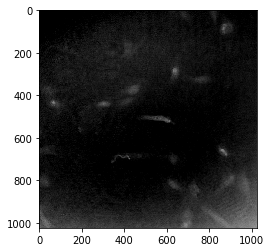

In [4]:
image = (image_list[26])
plt.imshow(image)

In [5]:
i = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)



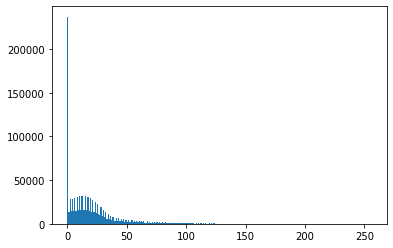

In [6]:
plt.hist(i.ravel(),256,[0,256]) 
plt.show() 

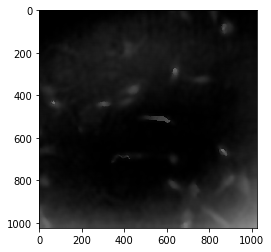

In [7]:
shifted = cv2.pyrMeanShiftFiltering(image, 10, 50)
plt.imshow(shifted)

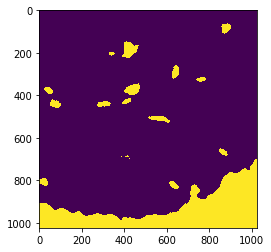

In [8]:
gray = cv2.cvtColor(shifted,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.imshow(thresh)

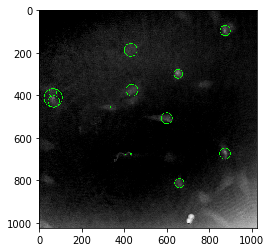

In [19]:
D = ndimage.distance_transform_edt(thresh)
localMax = peak_local_max(D, indices=False, min_distance=20, labels=thresh)

markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresh)

cx = []
cy = []
for label in np.unique(labels):
    if label == 0:
        continue
        
    
    mask = np.zeros(gray.shape, dtype='uint8')
    mask[labels == label] = 255
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    
    
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    ((x, y), r) = cv2.minEnclosingCircle(c)
    cx.append(int(x))
    cy.append(int(y))
    
    cv2.circle(image, (int(x), int(y)), int(r), (0, 255, 0), 2)
    
plt.imshow(image)

In [8]:
#cv2.imwrite('/home/jovyan/tr.png', image)